# [MidExam]-[MATH6149016 ; MATH6149049 ]-[MachineLearning]

**Thursday, April 28, 2022.**

**Student Name**  : Mary Regina Ang

**Student ID**    : 2440019781

**Video Link**    : https://youtu.be/GIpcAPZUpR8    

***Task:***   
**You are required to build `the best` multiclass classifier for the penguins dataset that achieves over 95% accuracy over the test set.**   
Your objectives are to:     
o Conduct a thorough exploratory data analysis (using graphs, statistical test, etc. and a verbal analysis)   
o Build `multiple potentially suitable classification models` (at least 2 different machine learning models).    
`For example:` By using different attributes or proportion for training and testing set or machine learning algorithms for each model or other schemas.    
o Choose what you assume to be the `"best"` model from these models for a final submission   

### 1. Data Description

The data used in this mid-exam called `Penguins` dataset, which is originally released as an `R package by Allison Horst`.  
   
The dataset contains the following columns:  
  
`CulmenLength` : The length in mm of the penguin's culmen (bill).    
`CulmenDepth`  : The depth in mm of the penguin's culmen.   
`FlipperLength`: The length in mm of the penguin's flipper.   
`BodyMass`     : The body mass of the penguin in grams.    
`Species`      : An integer value that represents the species of the penguin.(0 =Amelie; 1=Gentoo; 2=Chinstrap)

### (2% of points) - 2. Get the Data

##### Apply data acquistion and give explanation on each output

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


First, let's import library!

In [ ]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib as jb
sns.set_style('darkgrid')

Next, we're going to import the data.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding/penguins.csv')

To make sure that data has been imported, let's check it with head().

In [ ]:
df.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


Since we did it, let's go to the next step!

### (20% of points) - 3. Data Exploration

##### Apply data exploration, report the characteristics of your dataset (type of attributes & distribution, % of missing values, type of noise) and correlations between attributes (you may use statistical summaries and graphs), and write down your analysis and findings

In [ ]:
# Check the shape of dataframe
print(df.shape)

(344, 5)


From the output above, we can conclude that the rows is 344 and the columns is 5.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


From the output above, we can conclude that all the attributes are numeric.

In [ ]:
df.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.755814
std,5.459584,1.974793,14.061714,801.954536,0.762626
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


From above, we can see another detail about the features such as the count, mean, std, min, Q1, Q2, Q3, until max.

Let's check the distribution! First, I want to check the value counts of species attribute.

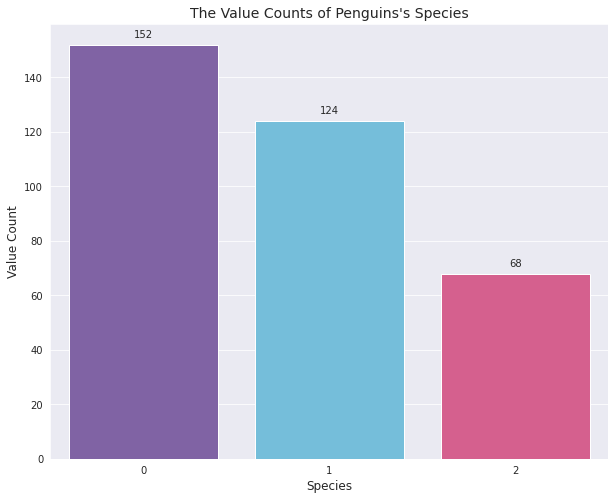

In [ ]:
color = ['#7F58AF', '#64C5EB', '#E84D8A']

sns.set_palette(sns.color_palette(color))

plt.figure(figsize = (10, 8))
plt.title("The Value Counts of Penguins's Species", size = 14)
cplot = sns.countplot(x = 'Species', data = df)
for plot in cplot.patches:
   cplot.annotate("%.0f" % plot.get_height(),
                  (plot.get_x() + plot.get_width() / 2, plot.get_height()),
                  (0, 10),
                  textcoords = 'offset points',
                  ha = 'center',
                  va = 'center')
plt.xlabel('Species', fontsize = 12)
plt.ylabel('Value Count', fontsize = 12)
plt.show()

From the bar plot, we can conclude that:

- Species 0 has the highest value counts among others which is 152.
- Species 1 has the second highest value counts among others which is 124.
- Species 2 has the lowest value counts among others which is 68.

Now, I want to check the distribution of species attribute as y-axis with another attribute as x-axis.

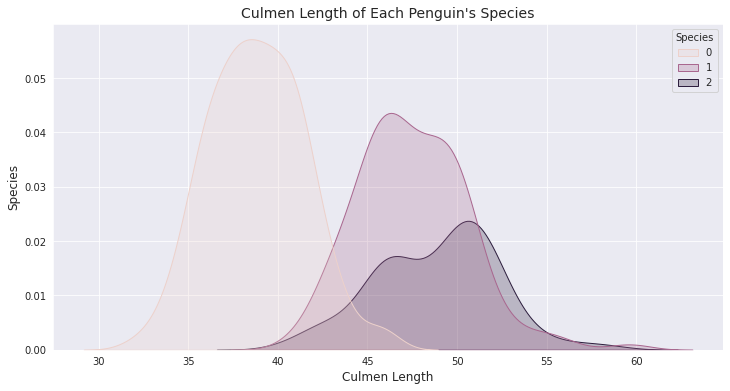

In [ ]:
plt.figure(figsize = (12, 6))
plt.title("Culmen Length of Each Penguin's Species", size = 14)
sns.kdeplot(data = df, x = 'CulmenLength', hue = 'Species', shade = True)
plt.xlabel('Culmen Length', fontsize = 12)
plt.ylabel('Species', fontsize = 12)
plt.show()

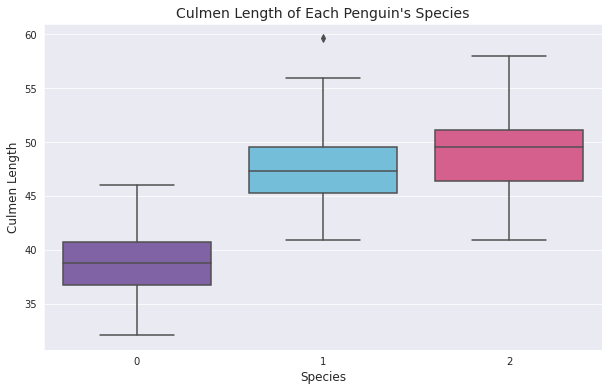

In [ ]:
color = ['#7F58AF', '#64C5EB', '#E84D8A']

sns.set_palette(sns.color_palette(color))

plt.figure(figsize = (10, 6))
plt.title("Culmen Length of Each Penguin's Species", size = 14)
sns.boxplot(data = df, x = 'Species', y = 'CulmenLength')
plt.xlabel('Species', fontsize = 12)
plt.ylabel('Culmen Length', fontsize = 12)
plt.show()

From graph above, we can conclude that:

- Species 0 tend to have shorter culmen than the others.
- Species 1 and species 2 tend to have longer culmen than species 0.
- Species 1 and species 2 tend to have the same length for culmen.

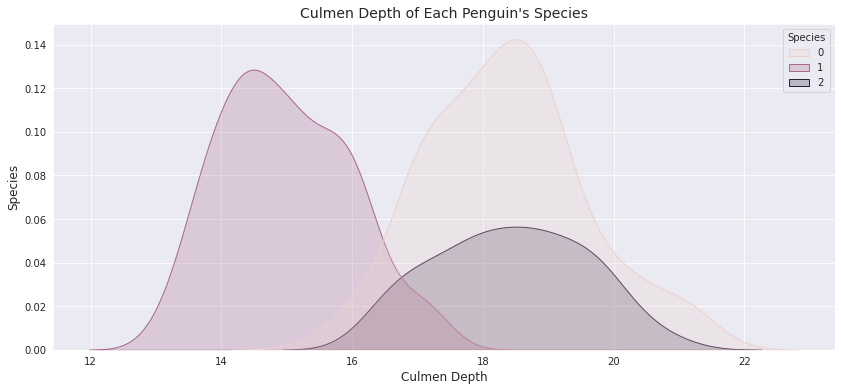

In [ ]:
plt.figure(figsize = (14, 6))
plt.title("Culmen Depth of Each Penguin's Species", size = 14)
sns.kdeplot(data = df, x = 'CulmenDepth', hue = 'Species', shade = True)
plt.xlabel('Culmen Depth', fontsize = 12)
plt.ylabel('Species', fontsize = 12)
plt.show()

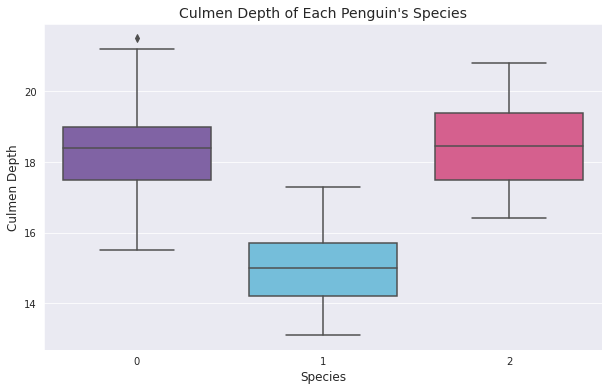

In [ ]:
color = ['#7F58AF', '#64C5EB', '#E84D8A']

sns.set_palette(sns.color_palette(color))

plt.figure(figsize = (10, 6))
plt.title("Culmen Depth of Each Penguin's Species", size = 14)
sns.boxplot(data = df, x = 'Species', y = 'CulmenDepth')
plt.xlabel('Species', fontsize = 12)
plt.ylabel('Culmen Depth', fontsize = 12)
plt.show()

From graph above, we can conclude that:

- Species 1 tend to have lower culmen depth than the others.
- Species 0 and species 2 tend to have higher culmen depth than species 1.
- Species 0 and species 2 tend to have the same depth for culmen.
- Species 0 have outlier.

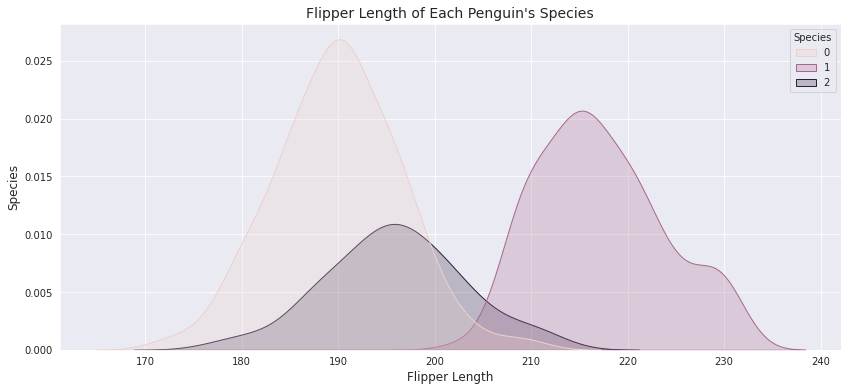

In [ ]:
plt.figure(figsize = (14, 6))
plt.title("Flipper Length of Each Penguin's Species", size = 14)
sns.kdeplot(data = df, x = 'FlipperLength', hue = 'Species', shade = True)
plt.xlabel('Flipper Length', fontsize = 12)
plt.ylabel('Species', fontsize = 12)
plt.show()

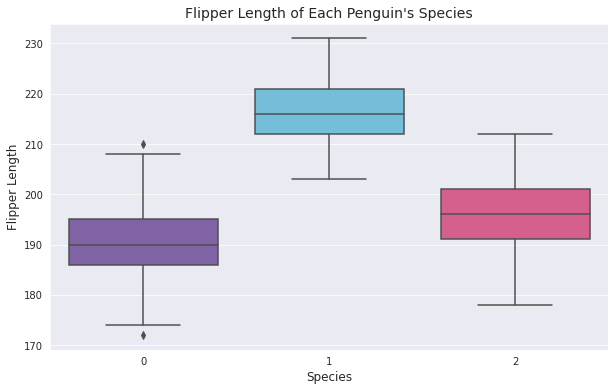

In [ ]:
color = ['#7F58AF', '#64C5EB', '#E84D8A']

sns.set_palette(sns.color_palette(color))

plt.figure(figsize = (10, 6))
plt.title("Flipper Length of Each Penguin's Species", size = 14)
sns.boxplot(data = df, x = 'Species', y = 'FlipperLength')
plt.xlabel('Species', fontsize = 12)
plt.ylabel('Flipper Length', fontsize = 12)
plt.show()

From graph above, we can conclude that:

- Species 1 tend to have longer flipper than the others.
- Species 0 and species 2 tend to have shorter flipper than species 1.
- Species 0 and species 2 tend to have the same length for flipper.
- Species 0 have outliers.

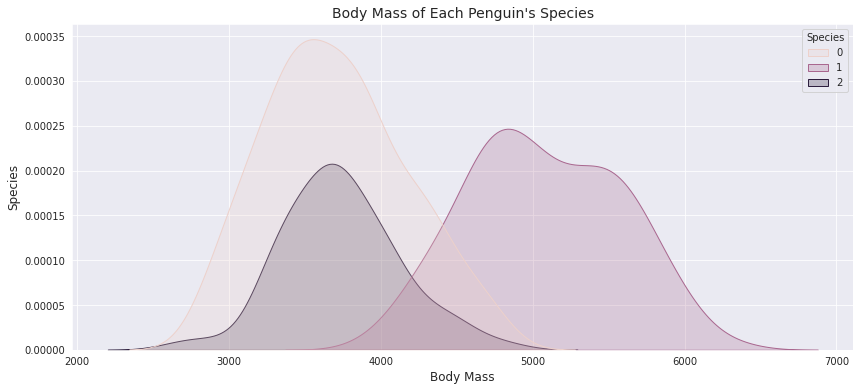

In [ ]:
plt.figure(figsize = (14, 6))
plt.title("Body Mass of Each Penguin's Species", size = 14)
sns.kdeplot(data = df, x = 'BodyMass', hue = 'Species', shade = True)
plt.xlabel('Body Mass', fontsize = 12)
plt.ylabel('Species', fontsize = 12)
plt.show()

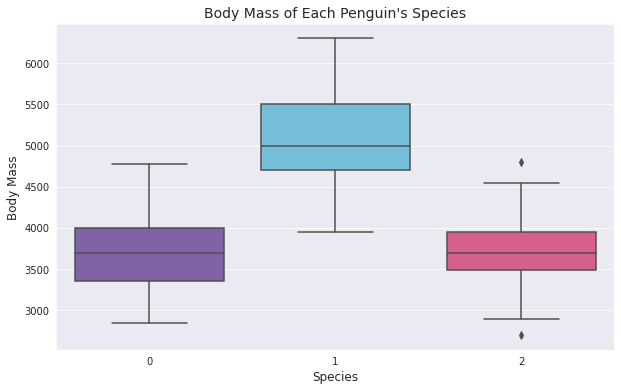

In [ ]:
color = ['#7F58AF', '#64C5EB', '#E84D8A']

sns.set_palette(sns.color_palette(color))

plt.figure(figsize = (10, 6))
plt.title("Body Mass of Each Penguin's Species", size = 14)
sns.boxplot(data = df, x = 'Species', y = 'BodyMass')
plt.xlabel('Species', fontsize = 12)
plt.ylabel('Body Mass', fontsize = 12)
plt.show()

From graph above, we can conclude that:

- Species 1 tend to have higher body mass than the others.
- Species 0 and species 2 tend to have lower body mass than species 1.
- Species 0 and species 2 tend to have the same body mass.
- Species 2 have outliers.

Now, let's check missing value!

In [ ]:
df.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

We could see that CulmenLength, CulmenDepth, FlipperLength, and BodyMass has 2 missing values.

Now, let's check which index that has the missing values in dataframe!

In [ ]:
df[df['CulmenLength'].isna()]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [ ]:
df[df['CulmenDepth'].isna()]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [ ]:
df[df['FlipperLength'].isna()]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [ ]:
df[df['BodyMass'].isna()]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


From dataframe above, we could see that the missing value is on third index and two hundred seventy first index.

Now, let's check the correlation of each attributes.

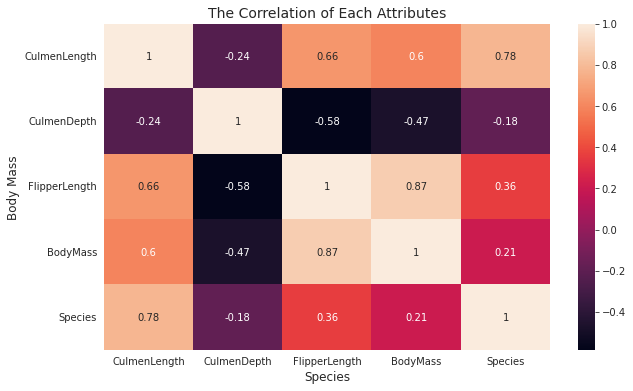

In [ ]:
plt.figure(figsize = (10, 6))
plt.title("The Correlation of Each Attributes", size = 14)
sns.heatmap(data = df.corr(), annot = True)
plt.xlabel('Species', fontsize = 12)
plt.ylabel('Body Mass', fontsize = 12)
plt.show()

From the graph, we can conclude that:

- Species and CulmenLength has a strong and positive relationship
- CulmenLength and BodyMass has a strong and positive relationship
- CulmenLength and FlipperLength has a strong and positive relationship
- FlipperLength and BodyMass has a very strong and positive relationship
- The others has not strong relationship and positive or negative relationship.

### (15% of points) - 4. Data Preparation

##### Prepare your data for machine learning and explain the outputs

When I do data exploration, we could see that the data has missing values and outliers. So, let's clean the data!

Since the data only has 2 missing values and our data has 344 rows, then we could just drop it.

In [ ]:
df.dropna(inplace = True) # drop missing value
df.reset_index(drop = True, inplace = True) # reset index

Now, let's check if the missing values has gone!

In [ ]:
df.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

In [ ]:
df[df['CulmenLength'].isna()]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species


In [ ]:
df[df['CulmenDepth'].isna()]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species


In [ ]:
df[df['FlipperLength'].isna()]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species


In [ ]:
df[df['BodyMass'].isna()]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species


Now, it's gone! Let's check if the outliers still exist! We're going to find the lower bound and upper bound of the data. If the value of each attributes is more than upper bound or less than lower bound, then we can conclude that the outliers are exist.

In [ ]:
Q75, Q25 = np.percentile(df.loc[:,'CulmenLength'], [75, 25])
IQR = Q75 - Q25
print(f'Q25 of CulmenLength: {Q25}')
print(f'Q75 of CulmenLength: {Q75}')
print(f'IQR of CulmenLength: {IQR}')

Q25 of CulmenLength: 39.225
Q75 of CulmenLength: 48.5
IQR of CulmenLength: 9.274999999999999


In [ ]:
lower_bound = Q25 - (1.5 * IQR)
upper_bound = Q75 + (1.5 * IQR)
print(f'Lower Bound of CulmenLength: {lower_bound}')
print(f'Upper Bound of CulmenLength: {upper_bound}')

Lower Bound of CulmenLength: 25.312500000000004
Upper Bound of CulmenLength: 62.412499999999994


In [ ]:
df[(df['CulmenLength'] > upper_bound) | (df['CulmenLength'] < lower_bound)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species


In [ ]:
Q75, Q25 = np.percentile(df.loc[:,'CulmenDepth'], [75, 25])
IQR = Q75 - Q25
print(f'Q25 of CulmenDepth: {Q25}')
print(f'Q75 of CulmenDepth: {Q75}')
print(f'IQR of CulmenDepth: {IQR}')

Q25 of CulmenDepth: 15.6
Q75 of CulmenDepth: 18.7
IQR of CulmenDepth: 3.0999999999999996


In [ ]:
lower_bound = Q25 - (1.5 * IQR)
upper_bound = Q75 + (1.5 * IQR)
print(f'Lower Bound of CulmenDepth: {lower_bound}')
print(f'Upper Bound of CulmenDepth: {upper_bound}')

Lower Bound of CulmenDepth: 10.95
Upper Bound of CulmenDepth: 23.349999999999998


In [ ]:
df[(df['CulmenDepth'] > upper_bound) | (df['CulmenDepth'] < lower_bound)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species


In [ ]:
Q75, Q25 = np.percentile(df.loc[:,'FlipperLength'], [75, 25])
IQR = Q75 - Q25
print(f'Q25 of FlipperLength: {Q25}')
print(f'Q75 of FlipperLength: {Q75}')
print(f'IQR of FlipperLength: {IQR}')

Q25 of FlipperLength: 190.0
Q75 of FlipperLength: 213.0
IQR of FlipperLength: 23.0


In [ ]:
lower_bound = Q25 - (1.5 * IQR)
upper_bound = Q75 + (1.5 * IQR)
print(f'Lower Bound of FlipperLength: {lower_bound}')
print(f'Upper Bound of FlipperLength: {upper_bound}')

Lower Bound of FlipperLength: 155.5
Upper Bound of FlipperLength: 247.5


In [ ]:
df[(df['FlipperLength'] > upper_bound) | (df['FlipperLength'] < lower_bound)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species


In [ ]:
Q75, Q25 = np.percentile(df.loc[:,'BodyMass'], [75, 25])
IQR = Q75 - Q25
print(f'Q25 of BodyMass: {Q25}')
print(f'Q75 of BodyMass: {Q75}')
print(f'IQR of BodyMass: {IQR}')

Q25 of BodyMass: 3550.0
Q75 of BodyMass: 4750.0
IQR of BodyMass: 1200.0


In [ ]:
lower_bound = Q25 - (1.5 * IQR)
upper_bound = Q75 + (1.5 * IQR)
print(f'Lower Bound of BodyMass: {lower_bound}')
print(f'Upper Bound of BodyMass: {upper_bound}')

Lower Bound of BodyMass: 1750.0
Upper Bound of BodyMass: 6550.0


In [ ]:
df[(df['BodyMass'] > upper_bound) | (df['BodyMass'] < lower_bound)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species


Since the missing value and outliers has gone, let's prepare the data we need for modelling!

First, we're going to split the data and all attributes except Species will be X. Meanwhile, Species attributes will be y. Also, X will be the predictor of y and y will be the variables we want to predict.

In [ ]:
X = df.drop('Species', axis = 1)
y = df['Species']

In [ ]:
X.head(10)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
5,38.9,17.8,181.0,3625.0
6,39.2,19.6,195.0,4675.0
7,34.1,18.1,193.0,3475.0
8,42.0,20.2,190.0,4250.0
9,37.8,17.1,186.0,3300.0


In [ ]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Species, dtype: int64

Now, we're going to do standardization by using standard scaler in order to prevent the data from large deviations.

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [ ]:
X.head(10)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
5,-0.921185,0.329038,-1.418347,-0.720240
6,-0.866155,1.241861,-0.421277,0.590980
7,-1.801661,0.481175,-0.563715,-0.907557
8,-0.352544,1.546135,-0.777373,0.060248
9,-1.122961,-0.025949,-1.062250,-1.126093


Now, we're going to split the data become training data and testing data for each X and y. I'm going to split the 70% of the data for training data and 30% of the data for testing data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(239, 4) (239,) (103, 4) (103,)


In [ ]:
X_train.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
204,1.133259,-1.090910,1.715302,0.996834
59,-1.508169,-0.127374,-1.133470,-1.313410
104,-0.774439,0.886874,-1.204689,-0.813898
213,0.326156,-1.648746,0.931890,0.247565
153,0.876453,-1.547322,0.647013,0.310004


In [ ]:
y_train.head()

204    1
59     0
104    0
213    1
153    1
Name: Species, dtype: int64

In [ ]:
X_test.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
299,1.481781,0.937586,-0.278838,-0.064630
301,1.023199,0.937586,-0.065180,-0.501703
7,-1.801661,0.481175,-0.563715,-0.907557
46,-1.177991,0.886874,-1.560785,-1.531947
206,0.197753,-0.888060,1.359205,1.059273


In [ ]:
y_test.head()

299    2
301    2
7      0
46     0
206    1
Name: Species, dtype: int64

Now, the data has been prepared. So, let's go to the next step!

###  (35% of points) - 5. Shortlist promising models

**Now, you can train your models, compare their performances, and display the performance metrics for each models.**   
***`You will get 10 extra points if you correctly compare your model using standard parameters against hyperparameters and provide a clear explanation.`***

I want to take 2 classifier models which is KNN and Random Forest.

In [ ]:
KNN_model = KNeighborsClassifier()
randomForest_model = RandomForestClassifier()

First, I want to use KNN first.

Before training our data, we have to use cross-validation to give us more accurate measure of the model quality.

In [ ]:
score = cross_val_score(KNN_model, X_train, y_train,
                         cv = 5,
                         scoring = 'accuracy')
print("Accuracy:\n", score)

Accuracy:
 [0.97916667 1.         1.         1.         0.9787234 ]


In [ ]:
print(f'Average Score of Accuracy: {score.mean()}')

Average Score of Accuracy: 0.9915780141843971


We could see the average of accuracy is so high which means it's a good idea to use KNN Classifier as our model.

Now, let's find the best hyperparameters for the KNN Classifier.

In [ ]:
grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7],
    'weights': ['uniform', 'distance']
}

gridSearch_KNN = GridSearchCV(KNN_model,
                              param_grid = grid,
                              cv = 5,
                              scoring = 'accuracy',
                              verbose = 3)
gridSearch_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.938 total time=   0.0s
[CV 2/5] END ....n_neighbors=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5] END ....n_neighbors=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5] END ....n_neighbors=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/5] END ....n_neighbors=2, weights=uniform;, score=0.957 total time=   0.0s
[CV 1/5] END ...n_neighbors=2, weights=distance;, score=0.979 total time=   0.0s
[CV 2/5] END ...n_neighbors=2, weights=distance;, score=0.958 total time=   0.0s
[CV 3/5] END ...n_neighbors=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5] END ...n_neighbors=2, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END ...n_neighbors=2, weights=distance;, score=0.957 total time=   0.0s
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

Let's find out the best results for our model hyperparameters!

In [ ]:
print(gridSearch_KNN.best_score_)
print(gridSearch_KNN.best_estimator_)
print(gridSearch_KNN.best_params_)

0.9957446808510639
KNeighborsClassifier(n_neighbors=3)
{'n_neighbors': 3, 'weights': 'uniform'}


Since we have find our best hyperparameters for KNN Classifier, let's tune our model with the best hyperparameters.

In [ ]:
new_KNN_model = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform')
new_KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now, let's predict the testing data with KNN Classifier!

In [ ]:
KNN_pred = new_KNN_model.predict(X_test)

Now, let's check the accuracy score of our predictor for the testing data!

In [ ]:
print(f'Accuracy Score: {new_KNN_model.score(X_test, y_test)}')

Accuracy Score: 0.9805825242718447


Since the accuracy score is 98%, the model is good fit!

Last but not least, I'm going to use Random Forest to be the model.

In [ ]:
score = cross_val_score(randomForest_model, X_train, y_train,
                         cv = 5,
                         scoring = 'accuracy')
print("Accuracy:\n", score)

Accuracy:
 [0.95833333 0.97916667 1.         1.         0.95744681]


In [ ]:
print(f'Average Score of Accuracy: {score.mean()}')

Average Score of Accuracy: 0.9789893617021276


We could see the average of accuracy is so high which means it's a good idea to use Random Forest as our model.

In [ ]:
grid2 = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth' : [3, 4, 5, 6, 7],
    'criterion' :['gini', 'entropy'],
    'max_features': ['auto', 'sqrt']
}

gridSearch_RF = GridSearchCV(randomForest_model,
                              param_grid = grid2,
                              cv = 5,
                              scoring = 'accuracy',
                              verbose = 3)
gridSearch_RF.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.958 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.917 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.979 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.979 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.957 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=200;, score=0.958 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=200;, score=0.917 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=200;, score=0.979 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=3, max_feat

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=3)

Now, let's check what is the best hyperparameters for Random Forest!

In [ ]:
print(gridSearch_RF.best_score_)
print(gridSearch_RF.best_estimator_)
print(gridSearch_RF.best_params_)

0.9831560283687942
RandomForestClassifier(max_depth=6, max_features='sqrt')
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


Since we have find our best hyperparameters for Random Forest, let's tune our model with the best hyperparameters.

In [ ]:
new_RF_model = RandomForestClassifier(n_estimators = 100,
                                      max_depth = 6,
                                      max_features = 'sqrt',
                                      criterion ='gini')
new_RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt')

Now, let's predict the testing data with Random Forest!

In [ ]:
RF_pred = new_RF_model.predict(X_test)

Now, let's check the accuracy score of our predictor for the testing data!

In [ ]:
print(f'Accuracy Score: {new_RF_model.score(X_test, y_test)}')

Accuracy Score: 0.970873786407767


Since the accuracy score is 97%, the model is good fit!

### (3% of points) - 6. Select Your Final Model

#### You finally have your final model. Write comments to justify your final model

After using 2 classifier models which is KNN classfier and Random Forest, we could see that both of the models have a good score and meet the expectation from the task where the task want the model to have accuracy over 95%. Since the accuracy scores are 98% (KNN) and 97% (Random Forest), then it's done for the training and testing. Now, we have to choose the final model. But, of course, we want the best choice for the final model, so I'm going to to choose the KNN Classfier as our final model.

***Verified by,***
   
[Noviyanti TM Sagala] (D6464) and sent to Department/Program on 04 04, 2022    